In [19]:
!jt

In [20]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from lightgbm import LGBMRegressor

In [23]:
data=pd.read_csv("new_train_2019.csv")

In [24]:
data.rename(columns={"to_2020":"hist_d"},inplace=True)
data


,act_id,iem_cd,byn_dt,hold_d,year,month,date,hist_d,test
0,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A128820,20190424,174,2019,4,24,170,4
1,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A043200,20190924,71,2019,9,24,67,4
2,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,A042510,20190524,241,2019,5,24,150,91
3,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,A001045,20190617,164,2019,6,17,135,29
4,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,A166090,20191030,85,2019,10,30,43,42
...,...,...,...,...,...,...,...,...,...
16034,b49870eda1fe80d5d0eb4c08c1e23b1e5055d466b4af33...,A028300,20191028,123,2019,10,28,45,78
16035,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A100700,20191120,38,2019,11,20,28,10
16036,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A026960,20190701,262,2019,7,1,125,137
16037,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A005180,20191112,35,2019,11,12,34,1


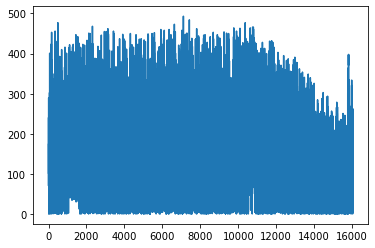

In [25]:
plt.plot(data.hold_d)

In [26]:
data.describe()

,byn_dt,hold_d,year,month,date,hist_d,test
count,1.603900e+04,16039.000000,16039.0,16039.000000,16039.000000,16039.000000,16039.000000
mean,2.019091e+07,136.865765,2019.0,8.882973,17.466426,73.671239,63.194526
std,3.314602e+02,110.288212,0.0,3.306715,8.430572,69.318482,64.993350
min,2.019010e+07,1.000000,2019.0,1.000000,1.000000,1.000000,0.000000
25%,2.019063e+07,40.000000,2019.0,6.000000,11.000000,14.000000,10.000000
50%,2.019103e+07,115.000000,2019.0,10.000000,18.000000,45.000000,39.000000
75%,2.019121e+07,217.000000,2019.0,12.000000,25.000000,128.000000,101.500000
max,2.019123e+07,493.000000,2019.0,12.000000,31.000000,246.000000,247.000000


In [27]:
cus = pd.read_csv("cus_info.csv")
iem = pd.read_csv("iem_info_20210902.csv")
hist = pd.read_csv("stk_bnc_hist.csv")

In [28]:
data = pd.merge(data,cus,how="left",on=['act_id'])
data = pd.merge(data,iem,how="left",on=["iem_cd"])

In [29]:
data

,act_id,iem_cd,byn_dt,hold_d,year,month,date,hist_d,test,sex_dit_cd,...,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A128820,20190424,174,2019,4,24,170,4,1,...,5,2,3,4,5,16,대성산업,7,3,99
1,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A043200,20190924,71,2019,9,24,67,4,1,...,5,2,3,4,5,16,파루,13,3,99
2,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,A042510,20190524,241,2019,5,24,150,91,1,...,4,2,5,2,6,1,라온시큐어,13,3,99
3,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,A001045,20190617,164,2019,6,17,135,29,1,...,4,2,5,2,6,1,CJ우,2,99,99
4,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,A166090,20191030,85,2019,10,30,43,42,1,...,4,2,5,2,6,1,하나머티리얼즈,13,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,b49870eda1fe80d5d0eb4c08c1e23b1e5055d466b4af33...,A028300,20191028,123,2019,10,28,45,78,2,...,6,2,2,2,3,16,에이치엘비,10,1,2
16035,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A100700,20191120,38,2019,11,20,28,10,1,...,5,2,5,3,5,2,세운메디칼,10,2,99
16036,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A026960,20190701,262,2019,7,1,125,137,1,...,5,2,5,3,5,2,동서,7,1,1
16037,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A005180,20191112,35,2019,11,12,34,1,1,...,5,2,5,3,5,2,빙그레,14,2,99


In [30]:
hist = pd.read_csv("stk_bnc_hist.csv")
hist['stk_p']=hist['tot_aet_amt']/hist['bnc_qty'] # 잔고 하나당 금액
hist=hist.fillna(0)

In [31]:
data = pd.merge(data,hist,how = "left", on=["act_id","iem_cd"])
data = data[(data['byn_dt']==data['bse_dt'])]
data.reset_index(drop=True, inplace=True)

data = data.drop(["act_id", "iem_cd", "byn_dt", "bse_dt"], axis = 1)


L_encoder=LabelEncoder()
L_encoder.fit(iem['iem_krl_nm'])
data['iem_krl_nm']=L_encoder.transform(data['iem_krl_nm'])


In [72]:
data['sex_dit_cd']=data['sex_dit_cd']-1

In [73]:
dd=data.drop(['month','date','year','test'],axis=1)

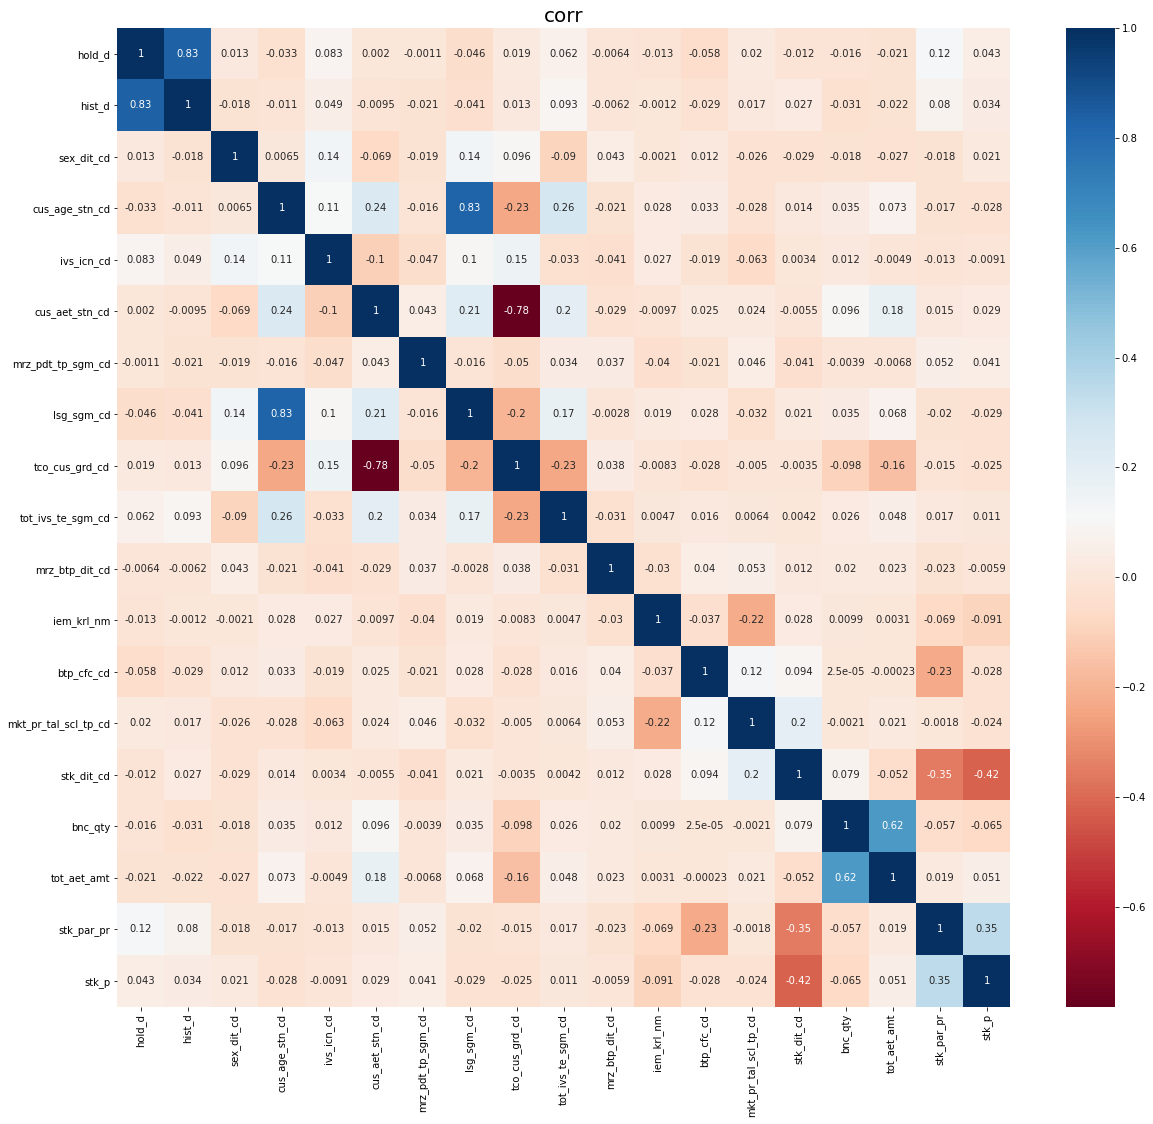

In [74]:
sns.heatmap(data=dd.corr(),annot=True,cmap='RdBu')
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.title('corr',fontsize=20)
plt.show()

In [75]:
dd

,hold_d,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,174,170,0,4,5,5,2,3,4,5,16,883,7,3,99,1670.0,9769500.0,5000.0,5850.0
1,71,67,0,4,5,5,2,3,4,5,16,2663,13,3,99,7999.0,19517560.0,500.0,2440.0
2,241,150,0,6,4,4,2,5,2,6,1,1082,13,3,99,1100.0,3789500.0,500.0,3445.0
3,164,135,0,6,4,4,2,5,2,6,1,60,2,99,99,23.0,1271900.0,5000.0,55300.0
4,85,43,0,6,4,4,2,5,2,6,1,2787,13,2,2,200.0,3400000.0,500.0,17000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,123,45,1,2,99,6,2,2,2,3,16,1851,10,1,2,264.0,34584000.0,500.0,131000.0
16035,38,28,0,6,0,5,2,5,3,5,2,1501,10,2,99,20.0,65600.0,100.0,3280.0
16036,262,125,0,6,0,5,2,5,3,5,2,984,7,1,1,2.0,38100.0,500.0,19050.0
16037,35,34,0,6,0,5,2,5,3,5,2,1330,14,2,99,1.0,56700.0,5000.0,56700.0


In [77]:
dd.columns

Index(['hold_d', 'hist_d', 'sex_dit_cd', 'cus_age_stn_cd', 'ivs_icn_cd',
       'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd', 'lsg_sgm_cd', 'tco_cus_grd_cd',
       'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd', 'iem_krl_nm', 'btp_cfc_cd',
       'mkt_pr_tal_scl_tp_cd', 'stk_dit_cd', 'bnc_qty', 'tot_aet_amt',
       'stk_par_pr', 'stk_p'],
      dtype='object')

In [82]:
Y=dd.hold_d
X=dd.drop(['hold_d'],axis=1)

In [83]:
X

,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,170,0,4,5,5,2,3,4,5,16,883,7,3,99,1670.0,9769500.0,5000.0,5850.0
1,67,0,4,5,5,2,3,4,5,16,2663,13,3,99,7999.0,19517560.0,500.0,2440.0
2,150,0,6,4,4,2,5,2,6,1,1082,13,3,99,1100.0,3789500.0,500.0,3445.0
3,135,0,6,4,4,2,5,2,6,1,60,2,99,99,23.0,1271900.0,5000.0,55300.0
4,43,0,6,4,4,2,5,2,6,1,2787,13,2,2,200.0,3400000.0,500.0,17000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,45,1,2,99,6,2,2,2,3,16,1851,10,1,2,264.0,34584000.0,500.0,131000.0
16035,28,0,6,0,5,2,5,3,5,2,1501,10,2,99,20.0,65600.0,100.0,3280.0
16036,125,0,6,0,5,2,5,3,5,2,984,7,1,1,2.0,38100.0,500.0,19050.0
16037,34,0,6,0,5,2,5,3,5,2,1330,14,2,99,1.0,56700.0,5000.0,56700.0


In [84]:
# 데이터 분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, train_test_split
#모델
from lightgbm import LGBMRegressor

y=Y
X=X

train_x,val_x,train_y,val_y=train_test_split(X,y,test_size=0.25,random_state=1)

model = LGBMRegressor(objective= "regression",
                          max_depth= 20,
                          n_estimators= 2000,
                          learning_rate= 0.01,
                          num_leaves = 31)

model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["rmse"],
              early_stopping_rounds=100,
              verbose=500)

Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 58.6355	valid_0's l2: 3438.12
[1000]	valid_0's rmse: 58.2123	valid_0's l2: 3388.67
[1500]	valid_0's rmse: 58.0874	valid_0's l2: 3374.15
Early stopping, best iteration is:
[1699]	valid_0's rmse: 58.0232	valid_0's l2: 3366.69


LGBMRegressor(learning_rate=0.01, max_depth=20, n_estimators=2000,
              objective='regression')

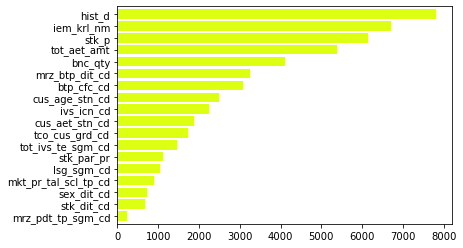

In [85]:
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11')
#fig=plt.gcf()
#fig.set_size_inches(30,28)
plt.show()

## 2020년에 구매한 test만 추출하여 모델로 예측한다.(같은 의미의 데이터이므로)

In [103]:
test=pd.read_csv("stk_hld_test.csv")

test_data = pd.merge(test,cus,how="left",on=['act_id'])
test_data = pd.merge(test_data,iem,how="left",on=["iem_cd"])

test_data = pd.merge(test_data, hist, how = "left", on = ["act_id", "iem_cd"])
test_data = test_data[(test_data["byn_dt"] == test_data["bse_dt"])]
test_data.reset_index(drop = True, inplace = True)

test_data_2020=test_data[test_data['byn_dt']>20200000]
test_data_201x=test_data[test_data['byn_dt']<20200000]

test_data_2020_sub=test_data_2020[['submit_id','hold_d']]

test_data_2020 = test_data_2020.drop(["act_id", "iem_cd", "byn_dt", "submit_id", "hold_d", "bse_dt"], axis = 1)
test_data_2020['iem_krl_nm']=L_encoder.transform(test_data_2020['iem_krl_nm'])



In [104]:
test_data_2020_sub

,submit_id,hold_d
0,IDX00001,0
2,IDX00003,0
3,IDX00004,0
4,IDX00005,0
5,IDX00006,0
...,...,...
70590,IDX70591,0
70591,IDX70592,0
70592,IDX70593,0
70594,IDX70595,0


In [105]:
test_data_2020

,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,153,1,9,3,2,2,9,5,5,8,418,4,1,1,300.0,3945000.0,5000.0,13150.0
2,139,1,9,3,2,2,9,5,5,8,1515,13,2,99,138.0,4291800.0,500.0,31100.0
3,236,1,9,3,2,2,9,5,5,8,2681,13,3,99,2972.0,6716720.0,500.0,2260.0
4,9,1,9,3,2,2,9,5,5,8,2450,13,1,2,10.0,464500.0,100.0,46450.0
5,93,1,6,0,3,2,5,5,6,9,2457,13,3,99,60.0,186900.0,500.0,3115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70590,62,1,6,0,5,2,5,3,5,2,1330,14,2,99,9.0,531000.0,5000.0,59000.0
70591,23,1,6,0,5,2,5,3,5,2,1369,2,1,1,1.0,198500.0,500.0,198500.0
70592,103,1,6,0,5,2,5,3,5,2,444,2,99,99,50.0,372000.0,5000.0,7440.0
70594,11,1,4,4,2,2,3,4,3,8,2373,8,2,99,96.0,11424000.0,2500.0,119000.0


In [106]:
predict=model.predict(test_data_2020)
predict

array([220.91672404, 217.4244108 , 342.2054103 , ..., 212.47197956,
        39.96110859,  27.49246569])

In [107]:
test_data_2020['pred']=predict
test_data_2020
test_data_2020['min_d']=test_data_2020['hist_d']+1
test_data_2020['max_d']=test_data_2020['hist_d']+146

maxvs=test_data_2020[['pred','max_d']]
maxvs['pred_max']=maxvs.min(axis=1)

minvs=pd.DataFrame(test_data_2020['min_d'])
minvs['pred_max']=maxvs['pred_max']
test_data_2020['pred_final']=minvs.max(axis=1)

test_data_2020

,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,...,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,pred,min_d,max_d,pred_final
0,153,1,9,3,2,2,9,5,5,8,...,1,1,300.0,3945000.0,5000.0,13150.0,220.916724,154,299,220.916724
2,139,1,9,3,2,2,9,5,5,8,...,2,99,138.0,4291800.0,500.0,31100.0,217.424411,140,285,217.424411
3,236,1,9,3,2,2,9,5,5,8,...,3,99,2972.0,6716720.0,500.0,2260.0,342.205410,237,382,342.205410
4,9,1,9,3,2,2,9,5,5,8,...,1,2,10.0,464500.0,100.0,46450.0,53.884146,10,155,53.884146
5,93,1,6,0,3,2,5,5,6,9,...,3,99,60.0,186900.0,500.0,3115.0,203.289953,94,239,203.289953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70590,62,1,6,0,5,2,5,3,5,2,...,2,99,9.0,531000.0,5000.0,59000.0,145.935457,63,208,145.935457
70591,23,1,6,0,5,2,5,3,5,2,...,1,1,1.0,198500.0,500.0,198500.0,135.216682,24,169,135.216682
70592,103,1,6,0,5,2,5,3,5,2,...,99,99,50.0,372000.0,5000.0,7440.0,212.471980,104,249,212.471980
70594,11,1,4,4,2,2,3,4,3,8,...,2,99,96.0,11424000.0,2500.0,119000.0,39.961109,12,157,39.961109


In [108]:
test_data_2020_sub['hold_d']=test_data_2020['pred_final']
test_data_2020_sub

,submit_id,hold_d
0,IDX00001,220.916724
2,IDX00003,217.424411
3,IDX00004,342.205410
4,IDX00005,53.884146
5,IDX00006,203.289953
...,...,...
70590,IDX70591,145.935457
70591,IDX70592,135.216682
70592,IDX70593,212.471980
70594,IDX70595,39.961109


In [109]:
test_data_2020_sub

,submit_id,hold_d
0,IDX00001,220.916724
2,IDX00003,217.424411
3,IDX00004,342.205410
4,IDX00005,53.884146
5,IDX00006,203.289953
...,...,...
70590,IDX70591,145.935457
70591,IDX70592,135.216682
70592,IDX70593,212.471980
70594,IDX70595,39.961109


In [110]:
sub_org=pd.read_csv("sub_basee.csv")
sub_org

,submit_id,hold_d
0,IDX00001,255.0
1,IDX00002,481.0
2,IDX00003,232.0
3,IDX00004,382.0
4,IDX00005,15.0
...,...,...
70591,IDX70592,39.0
70592,IDX70593,172.0
70593,IDX70594,863.0
70594,IDX70595,19.0


In [114]:
sub=pd.merge(sub_org,test_data_2020_sub,how="left",on=['submit_id'])
sub_0=sub.fillna(0)
sub_0

,submit_id,hold_d_x,hold_d_y
0,IDX00001,255.0,220.916724
1,IDX00002,481.0,0.000000
2,IDX00003,232.0,217.424411
3,IDX00004,382.0,342.205410
4,IDX00005,15.0,53.884146
...,...,...,...
70591,IDX70592,39.0,135.216682
70592,IDX70593,172.0,212.471980
70593,IDX70594,863.0,0.000000
70594,IDX70595,19.0,39.961109


In [118]:
sub_2020=sub_0[sub_0['hold_d_y']>0]
sub_201x=sub_0[sub_0['hold_d_y']==0]

sub_2020['pred']=sub_2020['hold_d_y']
sub_201x['pred']=sub_201x['hold_d_x']

In [119]:
sub_2020

,submit_id,hold_d_x,hold_d_y,pred
0,IDX00001,255.0,220.916724,220.916724
2,IDX00003,232.0,217.424411,217.424411
3,IDX00004,382.0,342.205410,342.205410
4,IDX00005,15.0,53.884146,53.884146
5,IDX00006,155.0,203.289953,203.289953
...,...,...,...,...
70590,IDX70591,104.0,145.935457,145.935457
70591,IDX70592,39.0,135.216682,135.216682
70592,IDX70593,172.0,212.471980,212.471980
70594,IDX70595,19.0,39.961109,39.961109


In [120]:
sub_201x

,submit_id,hold_d_x,hold_d_y,pred
1,IDX00002,481.0,0.0,481.0
7,IDX00008,866.0,0.0,866.0
9,IDX00010,656.0,0.0,656.0
11,IDX00012,1228.0,0.0,1228.0
12,IDX00013,613.0,0.0,613.0
...,...,...,...,...
64827,IDX64828,511.0,0.0,511.0
70580,IDX70581,1228.0,0.0,1228.0
70587,IDX70588,433.0,0.0,433.0
70588,IDX70589,503.0,0.0,503.0


In [123]:
sub_final=pd.concat([sub_2020,sub_201x])
sub_final=sub_final[['submit_id','pred']]
sub_final

,submit_id,pred
0,IDX00001,220.916724
2,IDX00003,217.424411
3,IDX00004,342.205410
4,IDX00005,53.884146
5,IDX00006,203.289953
...,...,...
64827,IDX64828,511.000000
70580,IDX70581,1228.000000
70587,IDX70588,433.000000
70588,IDX70589,503.000000


In [124]:
ss=pd.merge(sub_0,sub_final,how="left",on=['submit_id'])
ss

,submit_id,hold_d_x,hold_d_y,pred
0,IDX00001,255.0,220.916724,220.916724
1,IDX00002,481.0,0.000000,481.000000
2,IDX00003,232.0,217.424411,217.424411
3,IDX00004,382.0,342.205410,342.205410
4,IDX00005,15.0,53.884146,53.884146
...,...,...,...,...
70591,IDX70592,39.0,135.216682,135.216682
70592,IDX70593,172.0,212.471980,212.471980
70593,IDX70594,863.0,0.000000,863.000000
70594,IDX70595,19.0,39.961109,39.961109


In [125]:
ss.rename(columns={"pred":"hold_d"},inplace=True)
ss

,submit_id,hold_d_x,hold_d_y,hold_d
0,IDX00001,255.0,220.916724,220.916724
1,IDX00002,481.0,0.000000,481.000000
2,IDX00003,232.0,217.424411,217.424411
3,IDX00004,382.0,342.205410,342.205410
4,IDX00005,15.0,53.884146,53.884146
...,...,...,...,...
70591,IDX70592,39.0,135.216682,135.216682
70592,IDX70593,172.0,212.471980,212.471980
70593,IDX70594,863.0,0.000000,863.000000
70594,IDX70595,19.0,39.961109,39.961109


In [126]:
sub_0905_02=ss[['submit_id','hold_d']]
sub_0905_02

,submit_id,hold_d
0,IDX00001,220.916724
1,IDX00002,481.000000
2,IDX00003,217.424411
3,IDX00004,342.205410
4,IDX00005,53.884146
...,...,...
70591,IDX70592,135.216682
70592,IDX70593,212.471980
70593,IDX70594,863.000000
70594,IDX70595,39.961109


In [128]:
sub_0905_02.to_csv('sub_0905_only2020_newtrain.csv',index=False)

## 기존의 전체 train을 고려한 model로 예측한 sub에서 2020년에 구매한 test의 예측 값만 바꿔준다

In [95]:
test=pd.read_csv("stk_hld_test.csv")
test['year']=test['byn_dt']//10000
test

,act_id,iem_cd,byn_dt,hist_d,submit_id,hold_d,year
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0,2020
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0,2019
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0,2020
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A131760,20200120,236,IDX00004,0,2020
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A293490,20201217,9,IDX00005,0,2020
...,...,...,...,...,...,...,...
70591,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A000810,20201127,23,IDX70592,0,2020
70592,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A005945,20200731,103,IDX70593,0,2020
70593,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A004740,20170704,858,IDX70594,0,2017
70594,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A001630,20201215,11,IDX70595,0,2020
